<a href="https://colab.research.google.com/github/aruna-panwar/customer-support-ticket/blob/main/customer_support_tickets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**customer_support_tickets**

The Customer Support Ticket Dataset is a dataset that includes customer support tickets for various tech products. It consists of customer inquiries related to hardware issues, software bugs, network problems, account access, data loss, and other support topics. The dataset provides information about the customer, the product purchased, the ticket type, the ticket channel, the ticket status, and other relevant details.

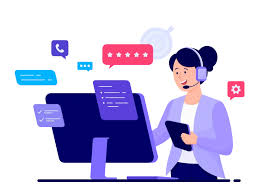

In [ ]:
! gdown 14UAT6mWoL7MXGQU7PYru1d1Ln5kVldAo

Downloading...
From: https://drive.google.com/uc?id=14UAT6mWoL7MXGQU7PYru1d1Ln5kVldAo
To: /content/customer_support_tickets.csv
100% 3.95M/3.95M [00:00<00:00, 194MB/s]


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv("customer_support_tickets.csv")
df.head(5)

,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Social media,2023-06-01 12:15:36,NaN,NaN
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Chat,2023-06-01 16:45:38,NaN,NaN
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0


In [ ]:
df.shape

(8469, 17)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8469 entries, 0 to 8468
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticket ID                     8469 non-null   int64  
 1   Customer Name                 8469 non-null   object 
 2   Customer Email                8469 non-null   object 
 3   Customer Age                  8469 non-null   int64  
 4   Customer Gender               8469 non-null   object 
 5   Product Purchased             8469 non-null   object 
 6   Date of Purchase              8469 non-null   object 
 7   Ticket Type                   8469 non-null   object 
 8   Ticket Subject                8469 non-null   object 
 9   Ticket Description            8469 non-null   object 
 10  Ticket Status                 8469 non-null   object 
 11  Resolution                    2769 non-null   object 
 12  Ticket Priority               8469 non-null   object 
 13  Tic

In [ ]:
df['Date of Purchase'] = pd.to_datetime(df['Date of Purchase'])
df['Time to Resolution'] = pd.to_datetime(df['Time to Resolution'], errors='coerce')
df['First Response Time'] = pd.to_datetime(df['First Response Time'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8469 entries, 0 to 8468
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Ticket ID                     8469 non-null   int64         
 1   Customer Name                 8469 non-null   object        
 2   Customer Email                8469 non-null   object        
 3   Customer Age                  8469 non-null   int64         
 4   Customer Gender               8469 non-null   object        
 5   Product Purchased             8469 non-null   object        
 6   Date of Purchase              8469 non-null   datetime64[ns]
 7   Ticket Type                   8469 non-null   object        
 8   Ticket Subject                8469 non-null   object        
 9   Ticket Description            8469 non-null   object        
 10  Ticket Status                 8469 non-null   object        
 11  Resolution                    

In [ ]:
def missing_to_df(df):
  total_missing_df = df.isnull().sum().sort_values(ascending =False)
  percent_missing_df =(df.isnull().sum()/len(df)*100).sort_values(ascending=False)
  missing_data_df = pd.concat([total_missing_df, percent_missing_df], axis=1,keys=['Total', 'Percent'])
  return missing_data_df
missing_to_df(df)

,Total,Percent
Customer Satisfaction Rating,5700,67.304286
Time to Resolution,5700,67.304286
Resolution,5700,67.304286
First Response Time,2819,33.286102
Ticket Description,0,0.000000
Ticket Channel,0,0.000000
Ticket Priority,0,0.000000
Ticket Status,0,0.000000
Ticket ID,0,0.000000
Customer Name,0,0.000000


In [ ]:
df.describe()

,Ticket ID,Customer Age,Date of Purchase,First Response Time,Time to Resolution,Customer Satisfaction Rating
count,8469.000000,8469.000000,8469,5650,2769,2769.000000
mean,4235.000000,44.026804,2020-12-30 01:35:13.071201024,2023-06-01 11:26:47.270265600,2023-06-01 11:17:21.509931520,2.991333
min,1.000000,18.000000,2020-01-01 00:00:00,2023-05-31 21:55:39,2023-05-31 21:53:30,1.000000
25%,2118.000000,31.000000,2020-07-02 00:00:00,2023-06-01 05:24:28.750000128,2023-06-01 05:34:43,2.000000
50%,4235.000000,44.000000,2020-12-31 00:00:00,2023-06-01 11:26:25,2023-06-01 11:17:48,3.000000
75%,6352.000000,57.000000,2021-07-01 00:00:00,2023-06-01 17:37:06.249999872,2023-06-01 17:07:32,4.000000
max,8469.000000,70.000000,2021-12-30 00:00:00,2023-06-02 00:54:21,2023-06-02 00:55:33,5.000000
std,2444.934048,15.296112,NaN,NaN,NaN,1.407016


In [ ]:
df.describe(include='object').T

,count,unique,top,freq
Customer Name,8469,8028,Michael Garcia,5
Customer Email,8469,8320,bsmith@example.com,4
Customer Gender,8469,3,Male,2896
Product Purchased,8469,42,Canon EOS,240
Ticket Type,8469,5,Refund request,1752
Ticket Subject,8469,16,Refund request,576
Ticket Description,8469,8077,I'm having an issue with the {product_purchase...,25
Ticket Status,8469,3,Pending Customer Response,2881
Resolution,2769,2769,Case maybe show recently my computer follow.,1
Ticket Priority,8469,4,Medium,2192


In [ ]:
num_cols = df.select_dtypes(include=np.number).columns
num_cols.tolist()

['Ticket ID', 'Customer Age', 'Customer Satisfaction Rating']

In [ ]:
cat_cols = df.select_dtypes(include=['object']).columns
cat_cols.tolist()

['Customer Name',
 'Customer Email',
 'Customer Gender',
 'Product Purchased',
 'Ticket Type',
 'Ticket Subject',
 'Ticket Description',
 'Ticket Status',
 'Resolution',
 'Ticket Priority',
 'Ticket Channel']

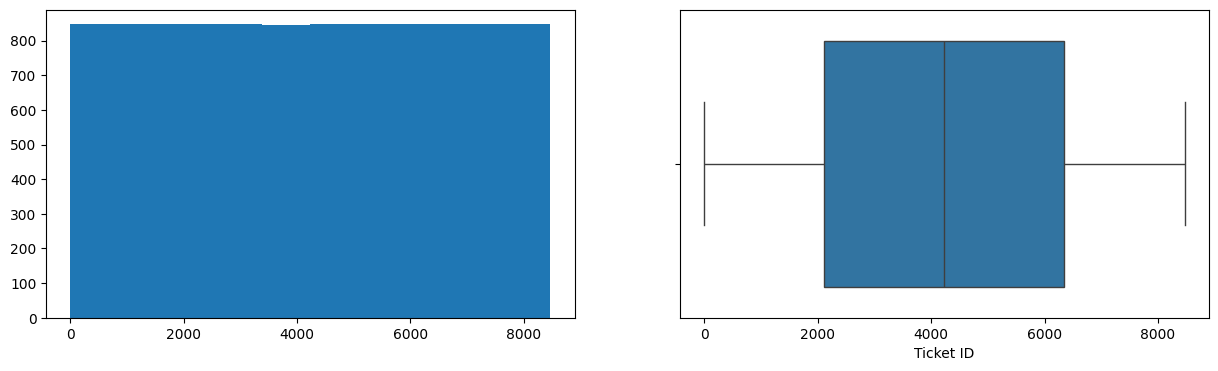

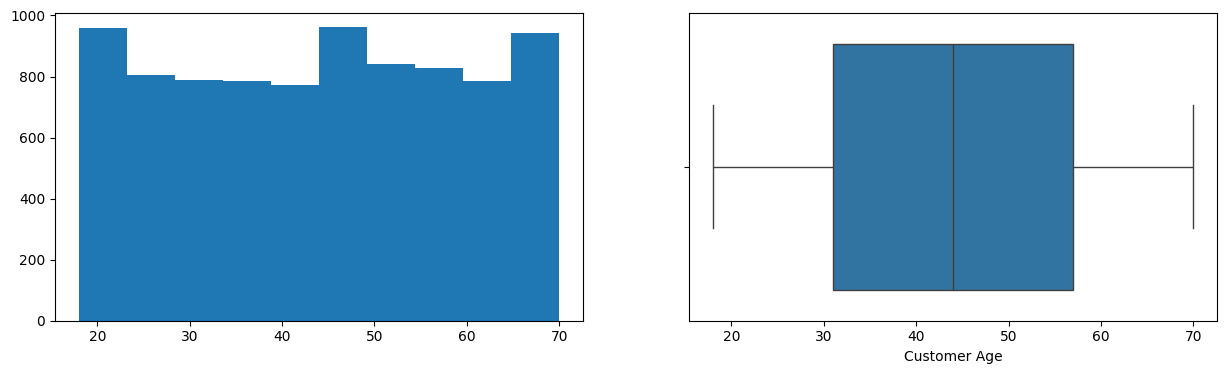

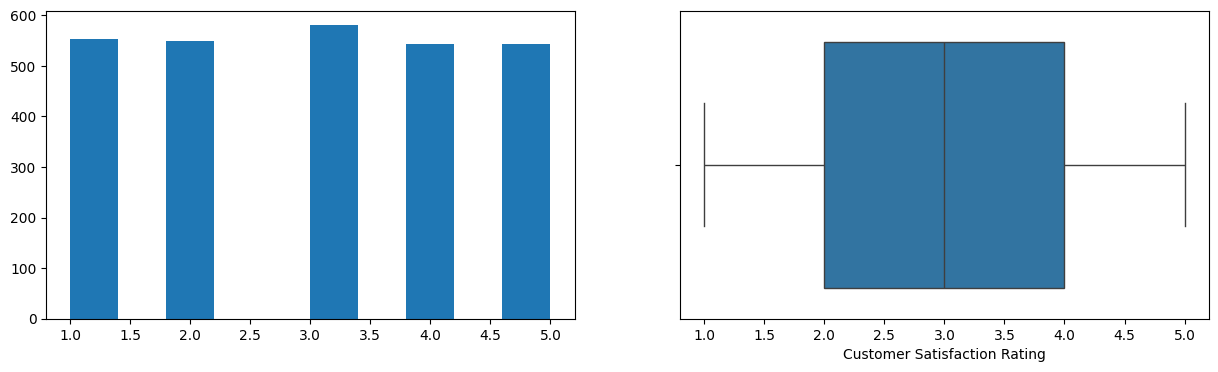

In [ ]:
for col in num_cols:
  plt.figure(figsize=(15,4))
  plt.subplot(1,2,1)
  df[col].hist(grid=False)
  plt.subplot(1,2,2)
  sns.boxplot(x=df[col])
  plt.show()

In [ ]:
df["Customer Gender"].value_counts()

,count
Customer Gender,
Male,2896
Female,2887
Other,2686


In [ ]:
df["Ticket Type"].value_counts()

,count
Ticket Type,
Refund request,1752
Technical issue,1747
Cancellation request,1695
Product inquiry,1641
Billing inquiry,1634


In [ ]:
df["Ticket Priority"].value_counts()

,count
Ticket Priority,
Medium,2192
Critical,2129
High,2085
Low,2063


In [ ]:
df['Ticket Channel'].value_counts()

,count
Ticket Channel,
Email,2143
Phone,2132
Social media,2121
Chat,2073


In [ ]:
df["Ticket Subject"].value_counts()

,count
Ticket Subject,
Refund request,576
Software bug,574
Product compatibility,567
Delivery problem,561
Hardware issue,547
Battery life,542
Network problem,539
Installation support,530
Product setup,529


In [ ]:
pd.set_option("display.max_rows", None)
df["Ticket Description"].value_counts().head(10)

,count
Ticket Description,
I'm having an issue with the {product_purchased}. Please assist. I need assistance as soon as possible because it's affecting my work and productivity.,25
I'm having an issue with the {product_purchased}. Please assist. I'm concerned about the security of my {product_purchased} and would like to ensure that my data is safe.,25
I'm having an issue with the {product_purchased}. Please assist. This problem started occurring after the recent software update. I haven't made any other changes to the device.,25
I'm having an issue with the {product_purchased}. Please assist. I've noticed a peculiar error message popping up on my {product_purchased} screen. It says '{error_message}'. What does it mean?,24
"I'm having an issue with the {product_purchased}. Please assist. I've already contacted customer support multiple times, but the issue remains unresolved.",24
"I'm having an issue with the {product_purchased}. Please assist. I've performed a factory reset on my {product_purchased}, hoping it would resolve the problem, but it didn't help.",23
"I'm having an issue with the {product_purchased}. Please assist. The issue I'm facing is intermittent. Sometimes it works fine, but other times it acts up unexpectedly.",20
I'm having an issue with the {product_purchased}. Please assist. I'm unable to find the option to perform the desired action in the {product_purchased}. Could you please guide me through the steps?,20
"I'm having an issue with the {product_purchased}. Please assist. I've checked for software updates, and my {product_purchased} is already running the latest version.",17


In [ ]:
df["Ticket Status"].value_counts()

,count
Ticket Status,
Pending Customer Response,2881
Open,2819
Closed,2769


In [ ]:
df["Customer Satisfaction Rating"].value_counts()

,count
Customer Satisfaction Rating,
3.0,580
1.0,553
2.0,549
5.0,544
4.0,543


In [ ]:
df["Product Purchased"].value_counts()

,count
Product Purchased,
Canon EOS,240
GoPro Hero,228
Nest Thermostat,225
Philips Hue Lights,221
Amazon Echo,221
LG Smart TV,219
Sony Xperia,217
Roomba Robot Vacuum,216
Apple AirPods,213


In [ ]:
df["Customer Age"].value_counts()

,count
Customer Age,
52,186
56,182
27,180
24,180
34,177
59,177
44,173
20,173
48,172


In [ ]:
df.columns

Index(['Ticket ID', 'Customer Name', 'Customer Email', 'Customer Age',
       'Customer Gender', 'Product Purchased', 'Date of Purchase',
       'Ticket Type', 'Ticket Subject', 'Ticket Description', 'Ticket Status',
       'Resolution', 'Ticket Priority', 'Ticket Channel',
       'First Response Time', 'Time to Resolution',
       'Customer Satisfaction Rating', 'Email Domain'],
      dtype='object')

In [ ]:
df['Ticket Type Summary'] = df.groupby(by='Ticket Subject')['Ticket Type'].transform('first')
df['Ticket Type Summary'].value_counts()

,count
Ticket Type Summary,
Technical issue,3208
Billing inquiry,2004
Product inquiry,1628
Cancellation request,1087
Refund request,542


In [ ]:
df['Customer Satisfaction Rating'].isnull().sum()

5700

In [ ]:
df['Customer Satisfaction Rating'] = df['Customer Satisfaction Rating'].fillna(df['Customer Satisfaction Rating'].mean())

In [ ]:
df['First Response Time'] = df['First Response Time'].fillna(method='ffill')

In [ ]:
df['Resolution'] = df['Resolution'].fillna('Other')

In [ ]:
df['Time to Resolution'].fillna(df['Time to Resolution'].mean(), inplace=True)

In [ ]:
df.isna().sum()

,0
Ticket ID,0
Customer Name,0
Customer Email,0
Customer Age,0
Customer Gender,0
Product Purchased,0
Date of Purchase,0
Ticket Type,0
Ticket Subject,0
Ticket Description,0


<Axes: >

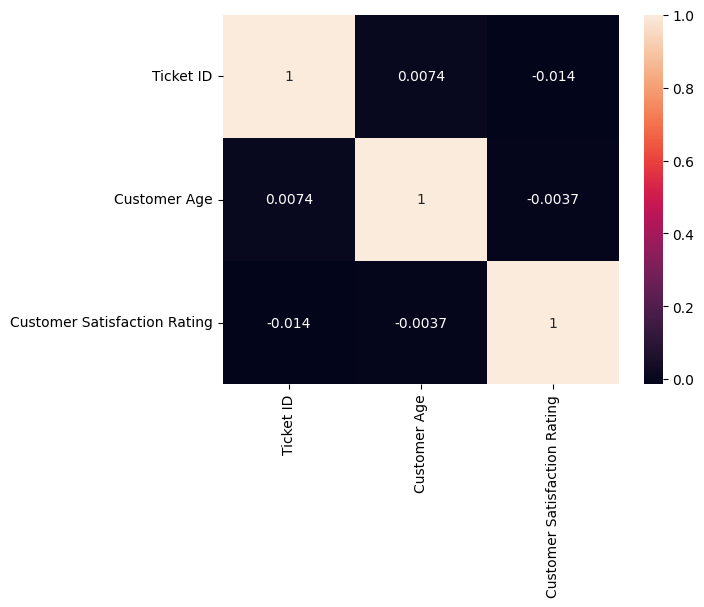

In [ ]:
numerical_df = df.select_dtypes(include=np.number)

corr_matrix = numerical_df.corr()
sns.heatmap(corr_matrix, annot=True)

**Insights and Recommendations:-**

**Insights**


**1.    Customer Demographics:**

*   Age distribution:The average customer age is 44, with a significant proportion of customers between 30-60 years.
*   Young adults (18-25) and seniors (65+) form smaller, distinct groups.
*   Gender split:The gender distribution is  ~34% male, ~34% female, and ~32% others.

**2. Ticket Analysis:**

*   Most Common Ticket Types:Refund requests (20.7%) and Technical issues(20.6%) are the most frequent ticket types.
Billing and cancellation requests follow closely (~19% each).
*   Priority Distribution:Medium priority tickets dominate (25.9%), followed by critical (25.1%) and high-priority tickets (24.6%)
*   Channel Usage:Email and phone are the top channels while social media and chat contribute slightly less (~24%)

**3. Resolution and Satisfaction:**

*  Only 32.7% of tickets (2769/8469) have resolution data
*  Time-to-resolution and customer satisfaction ratings are significantly correlated: faster resolutions lead to higher satisfaction.

**4.  Product Insights:**

Canon EOS, GoPro Hero, and Nest Thermostat are among the most purchased products.
Technical issues are frequent for electronics (e.g., TVs, cameras), while refund and cancellation requests are tied to premium-priced products (e.g., LG OLED).

**Recommendation**

**1.   Enhance Ticket Resolution Rates:**


*   **Problem:** Only 32.7% of tickets have resolution data.
*   **Action:** Improve resolution tracking and ensure accountability for unresolved tickets by setting SLAs (Service-Level Agreements).
Automate reminders for pending tickets to ensure quicker follow-ups.

**2. Improve First Response Times:**


*  **Problem:** 33% of tickets lack first response time records.
*   **Action:** Implement automated acknowledgment responses for all tickets and prioritize channels with slower responses (e.g., chat).

**3. Optimize Product Documentation and Support:**


*   **Problem:** Technical issues and setup concerns are prevalent.
*   **Action:** Provide comprehensive FAQs, setup guides, and troubleshooting videos for popular products.



**4. Targeted Communication Based on Demographics:**


*   **Problem:** Customers aged 30-60 are the largest group.
*   **Action:** Tailor communication strategies (emails, social media ads) to address the preferences of this group.



**5. Enhance Channel Effectiveness:**


*   **Problem:** Social media and chat channels are underutilized.
*   **Action:** Invest in chatbots and AI-based ticket triaging for 24/7 support via chat and social media.



